## CAPSTONE

# Data analysis road map


1. Load in the data
2. Clean data
    - Check for nulls
    - Unpack any
3. 

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
review_data = []
for line in open('Magazine_Subscriptions.json','r'):
    review_data.append(json.loads(line))


In [3]:
meta_data = []
for line in open('meta_Magazine_Subscriptions.json','r'):
    meta_data.append(json.loads(line))


In [4]:
review_data[0]

{'overall': 5.0,
 'vote': '9',
 'verified': False,
 'reviewTime': '11 8, 2001',
 'reviewerID': 'AH2IFH762VY5U',
 'asin': 'B00005N7P0',
 'reviewerName': 'ted sedlmayr',
 'reviewText': 'for computer enthusiast, MaxPC is a welcome sight in your mailbox. i can remember for years savorying every page of "boot" (as it was called in beginning) as i was (and still am) obcessed with PC\'s. Anyone, from advanced users - to beginners looking for knowledge - can profit from every issue of MaxPC. the icing on the cake is the subscription that comes with a CD-ROM as it is packed with demos, utilities, and other useful apps (very helpful for those not blessed with broadband connections). Until I discovered the community of hardware enthusiast web sites, MaxPC, formerly "boot", was my only really informative source for computing news and articles. To this day, i consider my subscription to it worth more than 10 subscriptions to most other computing mags. I can\'t wait until they merge with DVD media a

In [5]:
len(review_data)

89689

In [6]:
review_df = pd.DataFrame(review_data)
meta_df = pd.DataFrame(meta_data)

In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89689 entries, 0 to 89688
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         89689 non-null  float64
 1   vote            24103 non-null  object 
 2   verified        89689 non-null  bool   
 3   reviewTime      89689 non-null  object 
 4   reviewerID      89689 non-null  object 
 5   asin            89689 non-null  object 
 6   reviewerName    89687 non-null  object 
 7   reviewText      89656 non-null  object 
 8   summary         89670 non-null  object 
 9   unixReviewTime  89689 non-null  int64  
 10  style           51398 non-null  object 
 11  image           135 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 7.6+ MB


In [8]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         3385 non-null   object
 1   tech1            3385 non-null   object
 2   description      3385 non-null   object
 3   fit              3385 non-null   object
 4   title            3385 non-null   object
 5   also_buy         3385 non-null   object
 6   tech2            3385 non-null   object
 7   brand            3385 non-null   object
 8   feature          3385 non-null   object
 9   rank             3385 non-null   object
 10  also_view        3385 non-null   object
 11  details          3385 non-null   object
 12  main_cat         3385 non-null   object
 13  similar_item     3385 non-null   object
 14  date             3385 non-null   object
 15  price            3385 non-null   object
 16  asin             3385 non-null   object
 17  imageURL         3385 non-null   

In [9]:
review_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5.0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5.0,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3.0,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5.0,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5.0,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN


In [10]:
meta_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Magazine Subscriptions, Professional & Educat...",,[REASON is edited for people interested in eco...,,"<span class=""a-size-medium a-color-secondary""","[B002PXVYLE, B01MCU84LB, B000UHI2LW, B01AKS14A...",,Reason Magazine,[],[],"[B002PXVYLE, B000UHI2LW, B01MCU84LB, B002PXW18...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7NQ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,"[Magazine Subscriptions, Arts, Music &amp; Pho...",,[Written by and for musicians. Covers a variet...,,"<span class=""a-size-medium a-color-secondary""","[B002PXVYGE, B0054LRNC8, B000BVEELE, B00006KC3...",,String Letter Publishers,[],742 in Magazine Subscriptions (,"[B002PXVYGE, B0054LRNC8, B00006L16A, 171906487...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7OC,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Magazine Subscriptions, Fashion &amp; Style, ...",,[Allure is the beauty expert. Every issue is f...,,"<span class=""a-size-medium a-color-secondary""","[B001THPA4O, B002PXVZWW, B001THPA1M, B001THPA1...",,Conde Nast Publications,[],[],"[B002PXVZWW, B001THPA4O, B001THPA1M, B01N819UD...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7OD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,"[Magazine Subscriptions, Sports, Recreation & ...",,[FLIGHT JOURNAL includes articles on aviation ...,,"<span class=""a-size-medium a-color-secondary""","[B07JVF7QW4, B00ATQ6FPY, B002G551F6, B00008CGW...",,AirAge Publishing,[],[],"[B002G551F6, B00ATQ6FPY, B00005N7PT, B001THPA2...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7O9,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,"[Magazine Subscriptions, Professional & Educat...",,[RIDER is published for the road and street ri...,,"<span class=""a-size-medium a-color-secondary""","[B002PXVYD2, B01BM7TOU6, B000060MKJ, B000BNNIG...",,EPG Media & Specialty Information,[],[],"[B01BM7TOU6, B000060MKJ, B002PXVYD2, B000BNNIG...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7O6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,[],,"[The game's most widely read publication, GOLF...",,"<span class=""a-size-medium a-color-secondary""",[],,TI Golf Holdings,[],[],[],"{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B01HI8V19K,[],[]
3381,"[Magazine Subscriptions, Sports, Recreation & ...",,"[Built for the true classic car enthusiast, ea...",,"<span class=""a-size-medium a-color-secondary""","[B002PXVYO6, B01FIR6AJ4, B00006KGT1, B01DPP7H5...",,"Motorsport Marketing, Inc.",[],[],"[B01FV4YCNA, B00006KGT1, B002PXVYO6, B0047VIAI...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B01HI8V1I6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3382,"[Magazine Subscriptions, Fashion & Style]",,[InStyle celebrates the private side of public...,,"<span class=""a-size-medium a-color-secondary""",[],,Meredith Corporation,[],[],[],"{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B01HI8V0ZK,[],[]
3383,[],,[Sports Illustrated brings you spectacular act...,,"<span class=""a-size-medium a-color-secondary""",[],,Meredith Corporation,[],[],[],"{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B01HI8V1C2,[],[]


Check for NaN values in the dataframe

In [11]:
review_df.isnull().sum()

overall               0
vote              65586
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          2
reviewText           33
summary              19
unixReviewTime        0
style             38291
image             89554
dtype: int64

create a clean dataframe to store only numeric values.

In [12]:
clean_df = review_df[['overall','unixReviewTime']].copy()

# Check the created dataframe
clean_df.head()

,overall,unixReviewTime
0,5.0,1005177600
1,5.0,1004486400
2,3.0,1174694400
3,5.0,1163116800
4,5.0,1405296000


There are 65586 NaN values in vote, change all NaN values to 0 and add to the clean_df

In [13]:
clean_df['vote'] = review_df['vote'].replace(',','',regex=True)

clean_df['vote'] = clean_df['vote'].fillna(0).astype('int')

#

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89689 entries, 0 to 89688
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         89689 non-null  float64
 1   unixReviewTime  89689 non-null  int64  
 2   vote            89689 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 MB


Check values in the clean_df

In [15]:

print(clean_df.isnull().sum())

clean_df

overall           0
unixReviewTime    0
vote              0
dtype: int64


,overall,unixReviewTime,vote
0,5.0,1005177600,9
1,5.0,1004486400,9
2,3.0,1174694400,14
3,5.0,1163116800,13
4,5.0,1405296000,0
...,...,...,...
89684,5.0,1471305600,0
89685,1.0,1470787200,0
89686,5.0,1469923200,0
89687,5.0,1507161600,0


**Check values in the verified column and convert to numeric**

In [16]:
review_df['verified'].value_counts()

True     58654
False    31035
Name: verified, dtype: int64

In [17]:
# Map true to 1 and false to 0
clean_df['verified'] = review_df['verified'].map({True:1,False:0})

# check the added column
clean_df


,overall,unixReviewTime,vote,verified
0,5.0,1005177600,9,0
1,5.0,1004486400,9,0
2,3.0,1174694400,14,0
3,5.0,1163116800,13,0
4,5.0,1405296000,0,1
...,...,...,...,...
89684,5.0,1471305600,0,1
89685,1.0,1470787200,0,1
89686,5.0,1469923200,0,1
89687,5.0,1507161600,0,1


Check the amount of different reviewers

In [18]:
review_df['reviewerName'].value_counts()

Amazon Customer        4833
Kindle Customer        1053
Linda                    94
Susan                    67
Mike                     64
                       ... 
M. Kiser                  1
John A. Fugel             1
Lawrence J. Marotta       1
ATK                       1
Anthony M Asci            1
Name: reviewerName, Length: 58399, dtype: int64

In [19]:
review_df['reviewerID'].value_counts()

A3JPFWKS83R49V    55
A2OTUWUSH49XIN    26
AEMZRE6QYVQBS     25
A3GA09FYFKL4EY    24
A30H2335OM7RD6    22
                  ..
A1GOGNVAM9CWRK     1
A5RXVI67FLKMD      1
AGXYE9WZZ4DUG      1
ATYDFYTB5URNC      1
A1N6M7HRWMDE3D     1
Name: reviewerID, Length: 72098, dtype: int64

The `reviewerID` and `reviewerName` column show differrent lengths. The `reviewerName` column contains less information than the `reviewerID` column because users can have the same names but reviewerID is unique. Thus reviewerID should be used.

Convert the reviewerName column to a numeric representation using `pd.factorize`

In [20]:
clean_df['reviewer_ID'] = pd.factorize(review_df['reviewerID'])[0]

In [21]:
# clean_df['reviewerName']= review_df['reviewerName']

Do the same for the product column (ASIN)

In [22]:
clean_df['itemID'] = pd.factorize(review_df['asin'])[0]

In [23]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89689 entries, 0 to 89688
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         89689 non-null  float64
 1   unixReviewTime  89689 non-null  int64  
 2   vote            89689 non-null  int64  
 3   verified        89689 non-null  int64  
 4   reviewer_ID     89689 non-null  int64  
 5   itemID          89689 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.1 MB


There are 5804 different review dates

Show correlations between differen features

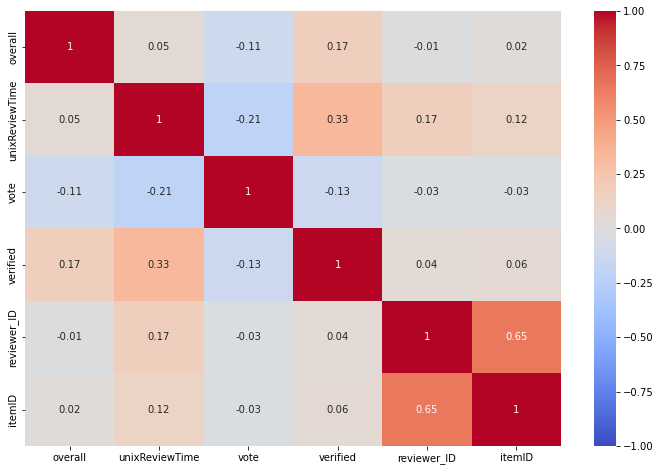

In [24]:
plt.figure(figsize= [12,8])
sns.heatmap(clean_df.corr().round(2), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

In [25]:
meta_df['details'][0]

{'Format:': 'Print Magazine',
 'Shipping: ': 'Currently, item can be shipped only within the U.S.',
 'Publisher:': 'Reason Magazine',
 'ASIN: ': 'B00005N7NQ'}

Check the number of unique products in the database

In [26]:
review_df['style'].value_counts()

{'Format:': ' Print Magazine'}    37638
{'Format:': ' Kindle Edition'}    13760
Name: style, dtype: int64

In [27]:
len(pd.unique(review_df['reviewerID']))

72098

There are 2428 unique products out of 89689 data entries


In [28]:
len(pd.unique(review_df['asin']))

2428

In [29]:
# check mean, std entries for each item
review_df.describe()

,overall,unixReviewTime
count,89689.000000,8.968900e+04
mean,4.036638,1.389447e+09
std,1.419791,1.039430e+08
min,1.000000,1.004054e+09
25%,3.000000,1.355184e+09
50%,5.000000,1.414109e+09
75%,5.000000,1.461542e+09
max,5.000000,1.537315e+09


The item with the most entries has 163 entries and every item has atleast 5 reviews. The mean is about 11 entries and the std is about 13 entries.